# Demo for linear inverse design of kirigami patterns with different offset fields

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Structure import *
from Utils import *


In [9]:
def structure_heart_3_3(interior_offsets):
    height = 3
    width = 3
    
    boundary_offset = 0.0
    boundary_offsets = np.array([[boundary_offset] * height,
                                 [boundary_offset] * width,
                                 [boundary_offset] * height,
                                 [boundary_offset] * width])

    points = np.array([[0, 0],
                       [-80, 50],
                       [-160, 35],
                       [-210, -45],
                       [-150, -170],
                       [0, -295],
                       [150, -170],
                       [210, -45],
                       [160, 35],
                       [80, 50]]) / 100.0
    
    corners = np.array([points[2], points[4], points[7], points[9]])

    structure = MatrixStructure(num_linkage_rows=height, num_linkage_cols=width)

    midpoints = np.array([np.mean(points[[2, 3], :], axis=0),
                                np.mean(points[[4, 5], :], axis=0),
                                np.mean(points[[5, 6], :], axis=0),
                                np.mean(points[[7, 8], :], axis=0),
                                np.mean(points[[9, 0], :], axis=0),
                                np.mean(points[[0, 1], :], axis=0)])

    structure.linear_inverse_design(boundary_points=midpoints,
                                          corners=corners,
                                          interior_offsets=interior_offsets,
                                          boundary_offsets=boundary_offsets)

    structure.assign_node_layers()
    structure.assign_quad_genders()
    structure.make_hinge_contact_points()

    return structure
    

## Example 1

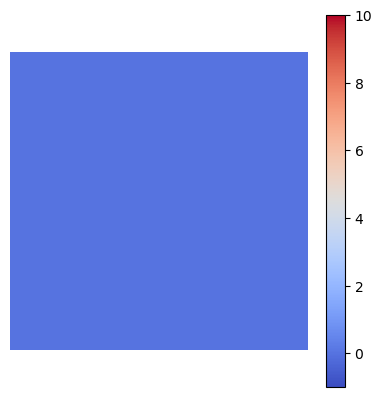

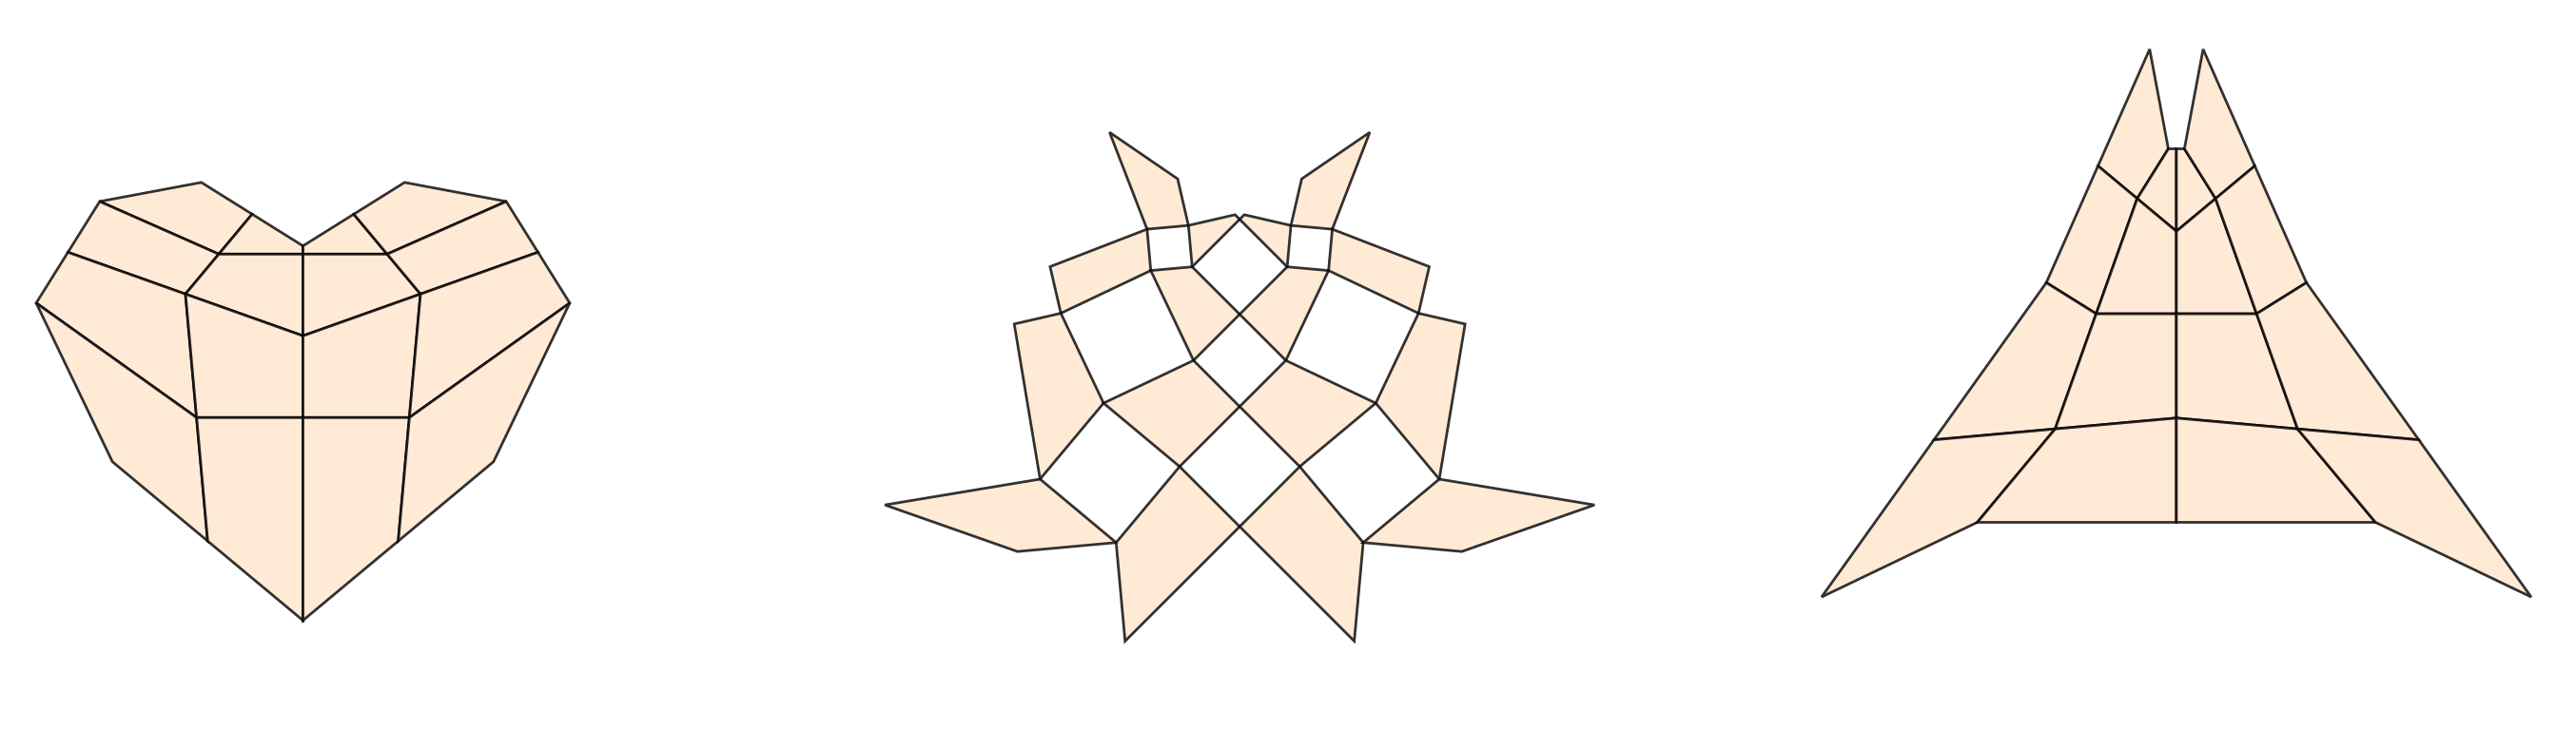

In [10]:
# set up the offset field
offset = 0.0
interior_offsets = np.array([[offset] * 3] * 3)

# plot the offset field
plt.matshow(interior_offsets, cmap='coolwarm')
plt.clim(-1, 10)
plt.axis('off')
cbar = plt.colorbar()

# Create a compact reconfigurable heart pattern with the corresponding offset field
structure = structure_heart_3_3(interior_offsets)

# plot deployment snapshots of the structure created
num_frames = 3
phis = np.linspace(np.pi, 0, num_frames)
panel_size = 10
fig, axs = plt.subplots(1, num_frames, figsize=(1.2*panel_size*num_frames, panel_size), sharey=True)

for ax_ind, phi in enumerate(phis):
    
    deployed_points, deployed_hinge_contact_points = structure.layout(phi)
    deployed_points = rotate_points(deployed_points, np.array([0, 0]), -(np.pi - phi)/2.0)
    plot_structure(deployed_points, structure.quads, structure.linkages, axs[ax_ind])
    
#     write_obj('Example_heart1_' + str(ax_ind) + '.obj', deployed_points, structure.quads)

## Example 2

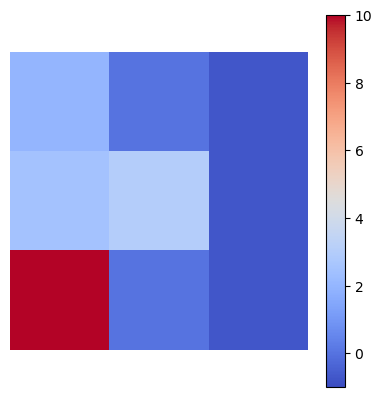

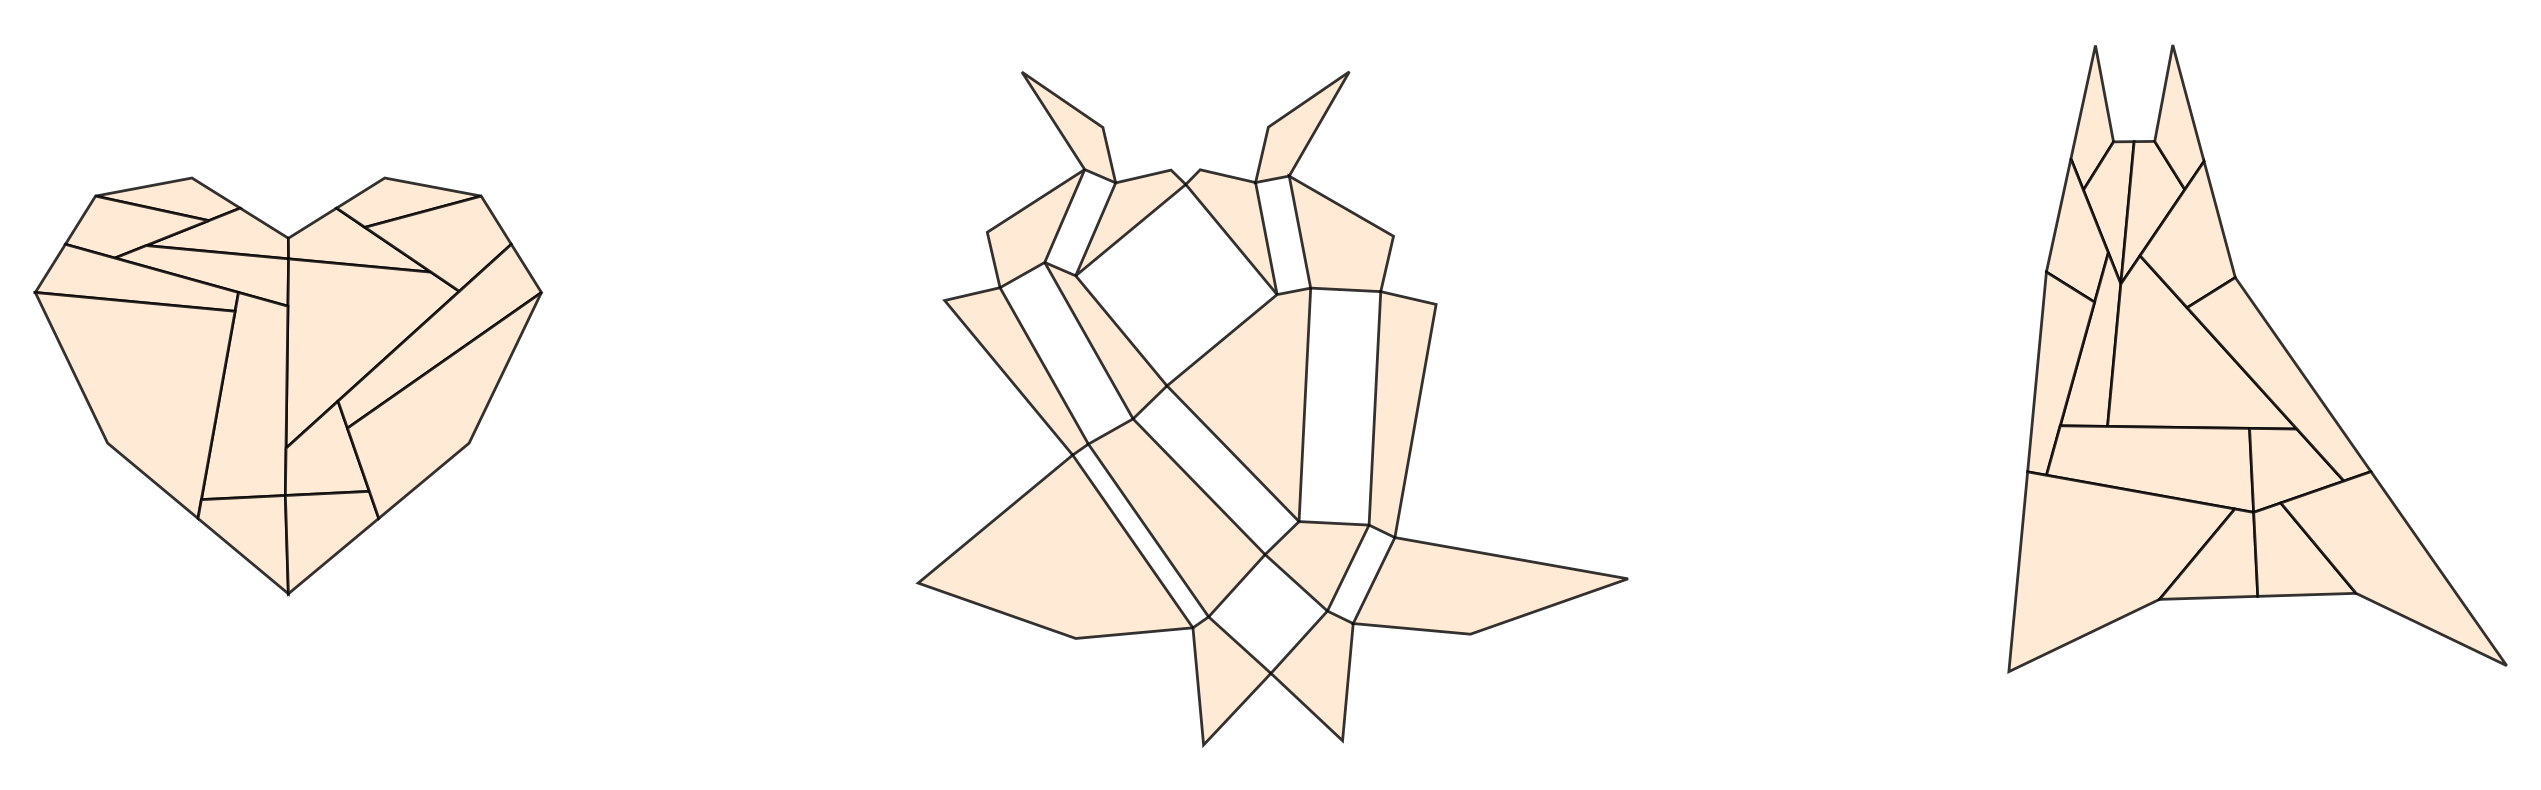

In [11]:
# set up the offset field
interior_offsets = np.array([[ 2. ,  0. , -0.7],
       [ 2.5,  3. , -0.7],
       [10. ,  0. , -0.7]])

# plot the offset field
plt.matshow(interior_offsets, cmap='coolwarm')
plt.clim(-1, 10)
plt.axis('off')
cbar = plt.colorbar()

# Create a compact reconfigurable heart pattern with the corresponding offset field
structure = structure_heart_3_3(interior_offsets)

# plot deployment snapshots of the structure created
num_frames = 3
phis = np.linspace(np.pi, 0, num_frames)
panel_size = 10
fig, axs = plt.subplots(1, num_frames, figsize=(1.2*panel_size*num_frames, panel_size), sharey=True)

for ax_ind, phi in enumerate(phis):
    
    deployed_points, deployed_hinge_contact_points = structure.layout(phi)
    deployed_points = rotate_points(deployed_points, np.array([0, 0]), -(np.pi - phi)/2.0)
    plot_structure(deployed_points, structure.quads, structure.linkages, axs[ax_ind])
#     write_obj('Example_heart2_' + str(ax_ind) + '.obj', deployed_points, structure.quads)

## Example 3

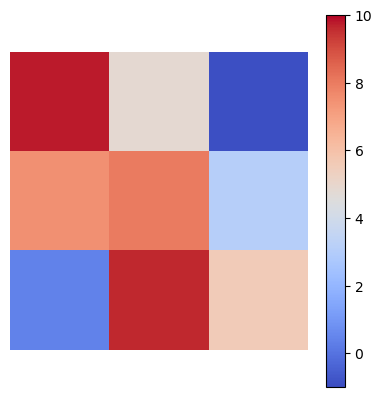

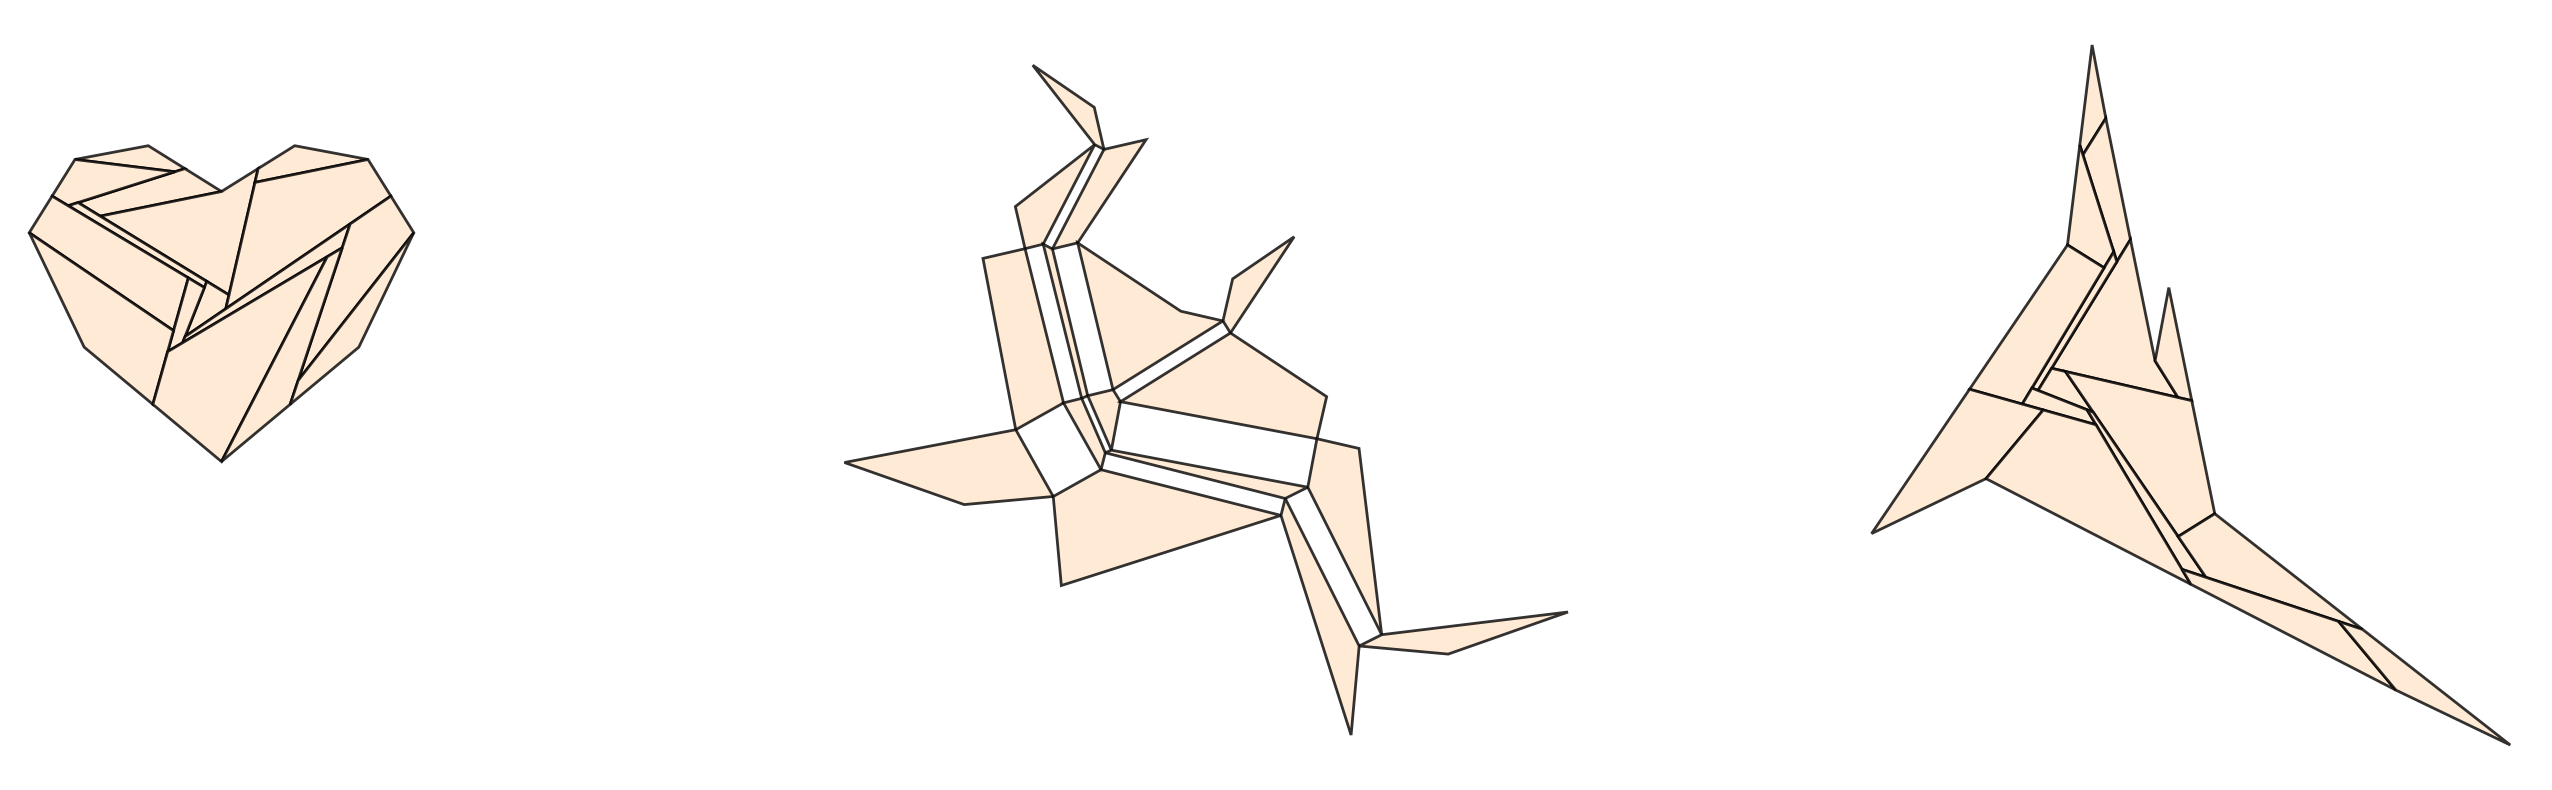

In [12]:
# set up the offset field
interior_offsets = np.array([[ 9.77577666,  4.81276041, -0.89066558],
       [ 7.49595419,  7.98298775,  3.05358004],
       [ 0.39784886,  9.64846176,  5.54344204]])

# plot the offset field
plt.matshow(interior_offsets, cmap='coolwarm')
plt.clim(-1, 10)
plt.axis('off')
cbar = plt.colorbar()

# Create a compact reconfigurable heart pattern with the corresponding offset field
structure = structure_heart_3_3(interior_offsets)

# plot deployment snapshots of the structure created
num_frames = 3
phis = np.linspace(np.pi, 0, num_frames)
panel_size = 10
fig, axs = plt.subplots(1, num_frames, figsize=(1.2*panel_size*num_frames, panel_size), sharey=True)

for ax_ind, phi in enumerate(phis):
    
    deployed_points, deployed_hinge_contact_points = structure.layout(phi)
    deployed_points = rotate_points(deployed_points, np.array([0, 0]), -(np.pi - phi)/2.0)
    plot_structure(deployed_points, structure.quads, structure.linkages, axs[ax_ind])
#     write_obj('Example_heart3_' + str(ax_ind) + '.obj', deployed_points, structure.quads)